# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [2]:
df = pd.read_csv("data/comprar_alquilar.csv")
df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [4]:
df.isnull().sum()

ingresos          0
gastos_comunes    0
pago_coche        0
gastos_otros      0
ahorros           0
vivienda          0
estado_civil      0
hijos             0
trabajo           0
comprar           0
dtype: int64

In [5]:
num_filas, num_columnas = df.shape

print(f"El DataFrame tiene {num_filas} filas y {num_columnas} columnas.")

El DataFrame tiene 202 filas y 10 columnas.


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

In [8]:
# sns.set(style="whitegrid")

# # Iterar por todas las columnas excepto el target
# for column in df.columns:
#     if column != "comprar" and df[column].dtype in ["int64", "float64"]:  # Solo para variables numéricas
#         plt.figure(figsize=(8, 5))
#         sns.histplot(data=df, x=column, hue="comprar", kde=True, palette="coolwarm", bins=30, alpha=0.7)
#         plt.title(f"Distribución de {column} por target (comprar)")
#         plt.xlabel(column)
#         plt.ylabel("Frecuencia")
#         plt.legend(title="Comprar", labels=["No", "Sí"])
#         plt.show()

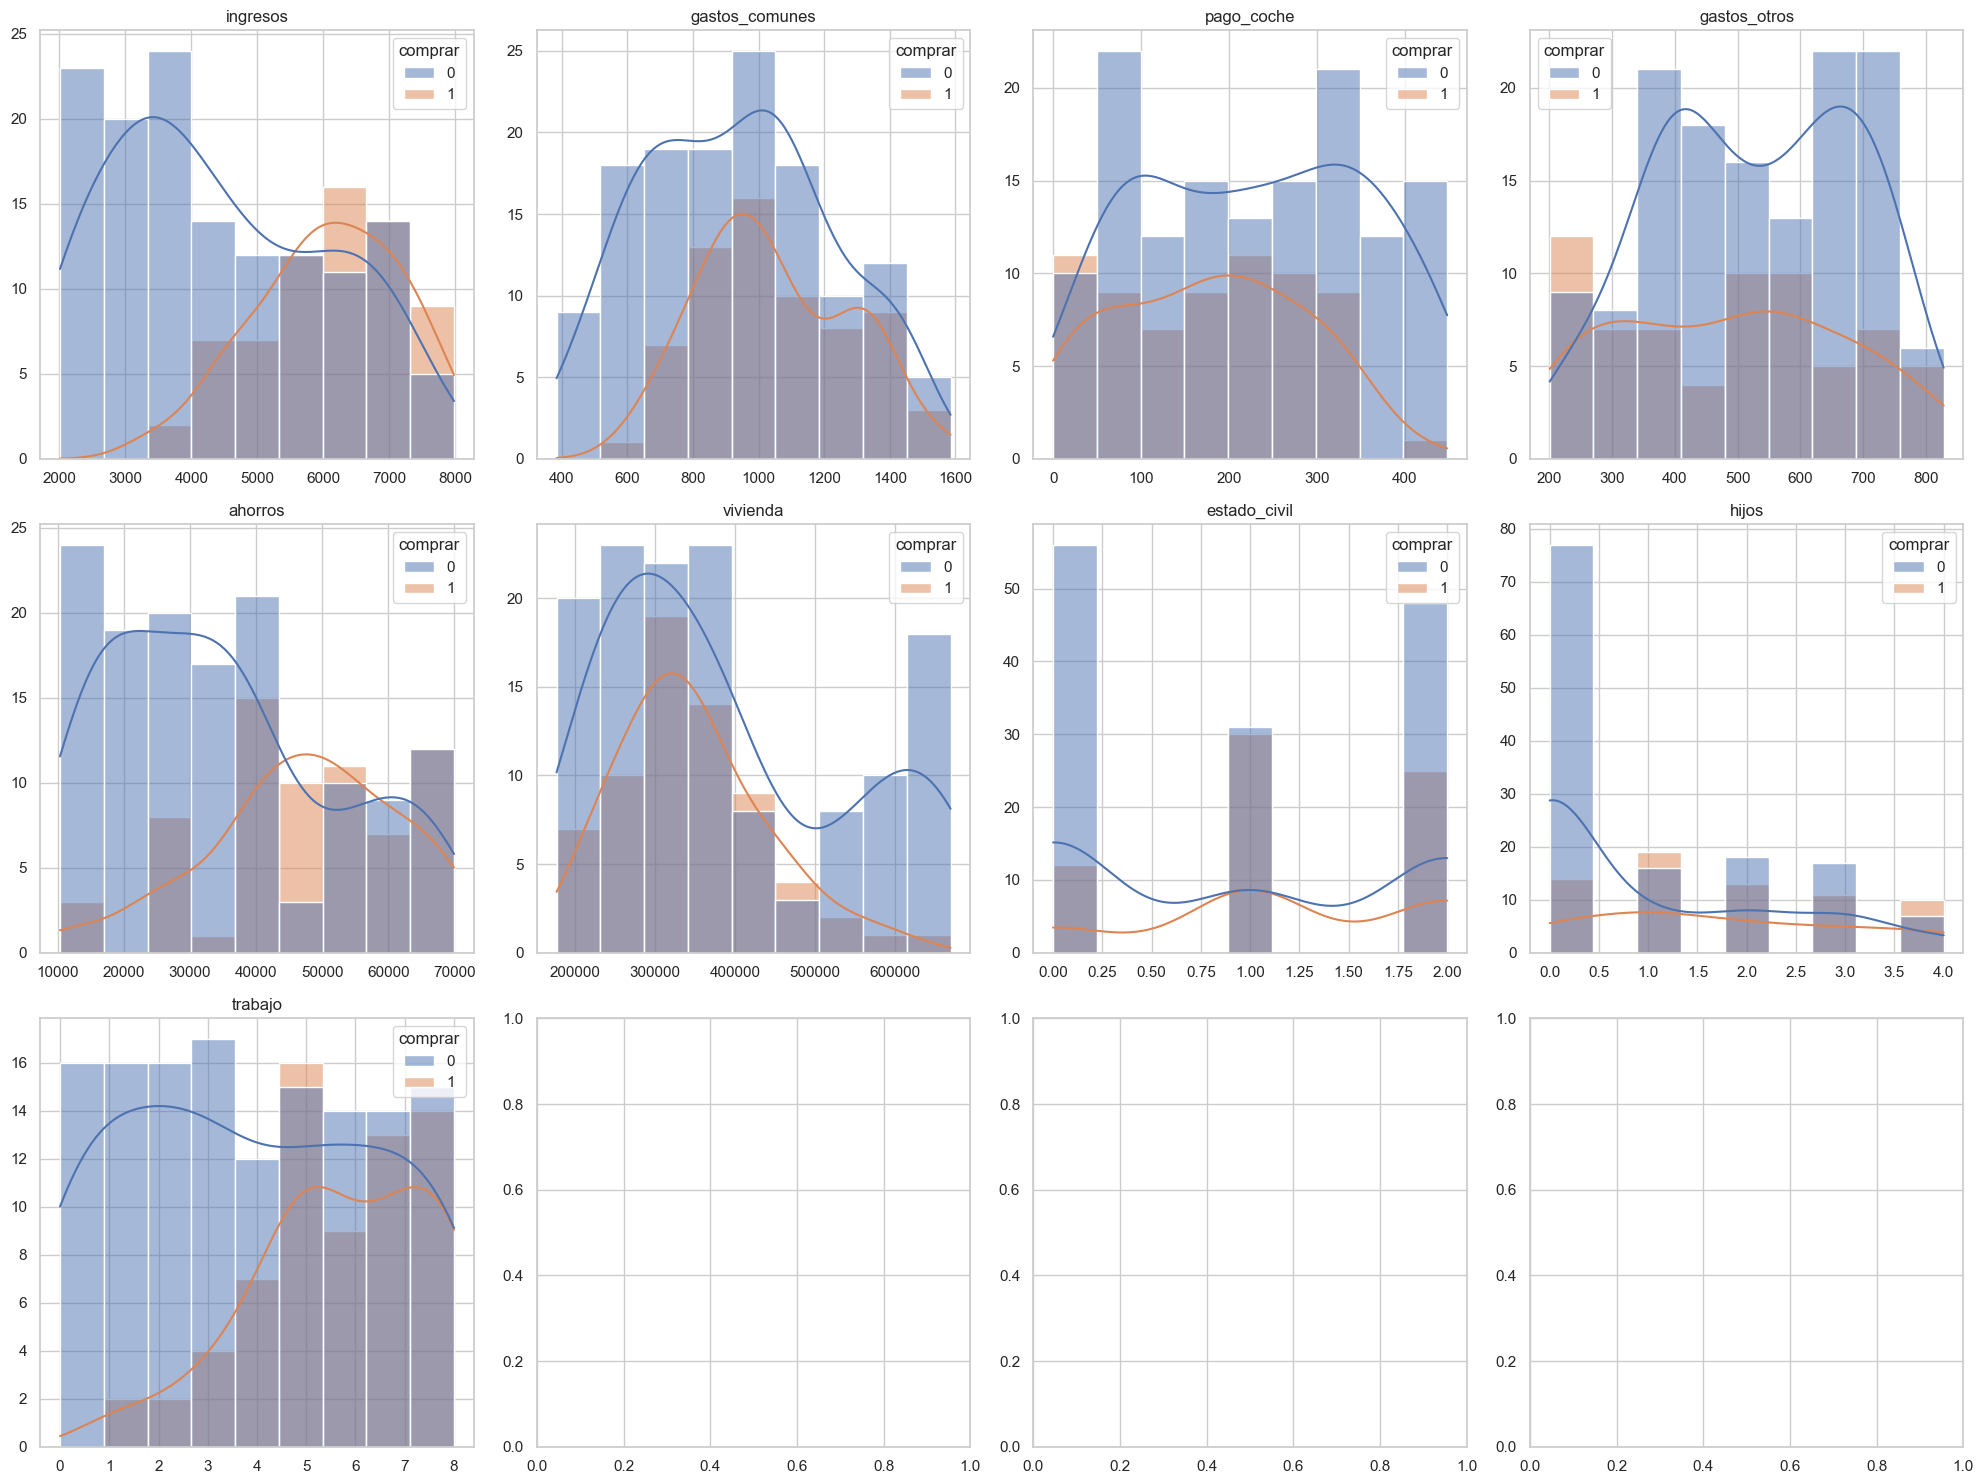

In [7]:
# Crear una cuadrícula de subgráficos
num_variables = len(df.columns)
rows = (num_variables + 3) // 4  # 4 gráficos por fila
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))  # Ajustar tamaño de los subgráficos
axes = axes.flatten()

# Generar cada gráfico en un subgráfico
for i, column in enumerate(df.columns):
    if column == 'comprar':  # Ignorar la columna target como variable gráfica
        continue
    
    sns.histplot(data=df, x=column, hue='comprar', kde=True, ax=axes[i])
    axes[i].set_title(column, fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Ajustar el diseño para que no se superpongan los títulos
plt.tight_layout()
plt.show()

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [21]:
from sklearn.preprocessing import StandardScaler

features = df.drop(columns=["comprar"])
target = df["comprar"]


scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None) 
pca.fit_transform(features_standardized)
pca

PCA()

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

# 1

In [26]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print()
print(f"Varianza explicada acumulada: {explained_variance.cumsum()[-1]:.4f}")

[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]

Varianza explicada acumulada: 1.0000


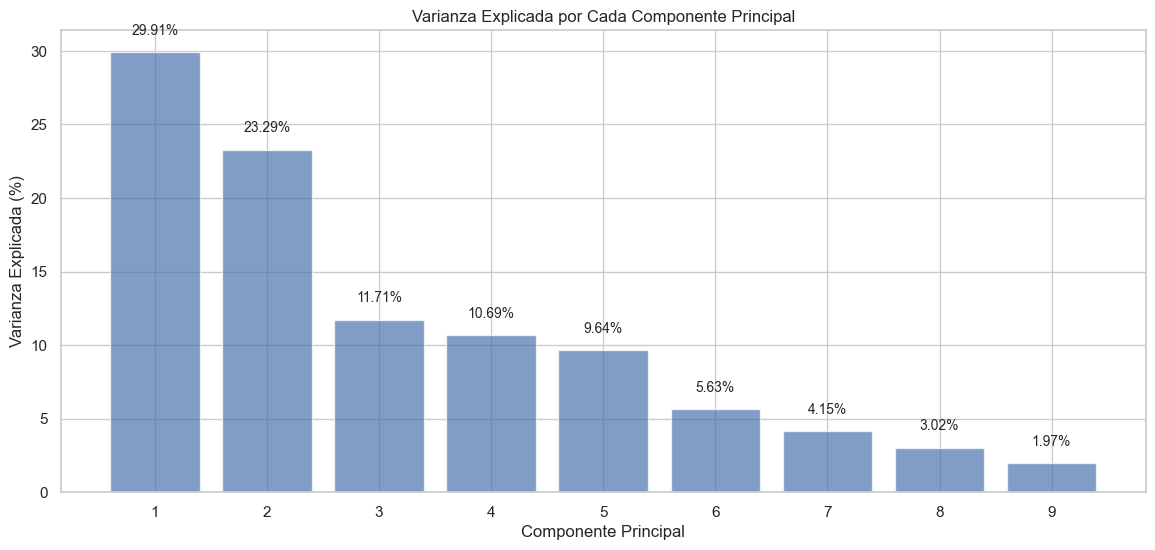

In [27]:
plt.figure(figsize=(14, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.7)

# Añadimos las etiquetas con el porcentaje en cada barra
for i, v in enumerate(explained_variance * 100):
    plt.text(i + 1, v + 1, f"{v:.2f}%", ha='center', va='bottom', fontsize=10)

plt.title('Varianza Explicada por Cada Componente Principal')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada (%)')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

# # Si deseas ver las componentes principales (las "proyecciones" de cada feature)
# components = pca.components_
# print(f"Componentes principales:\n{components}")

# Transformamos los datos originales al nuevo espacio de componentes principales
df_pca = pca.transform(features_standardized)

# 2

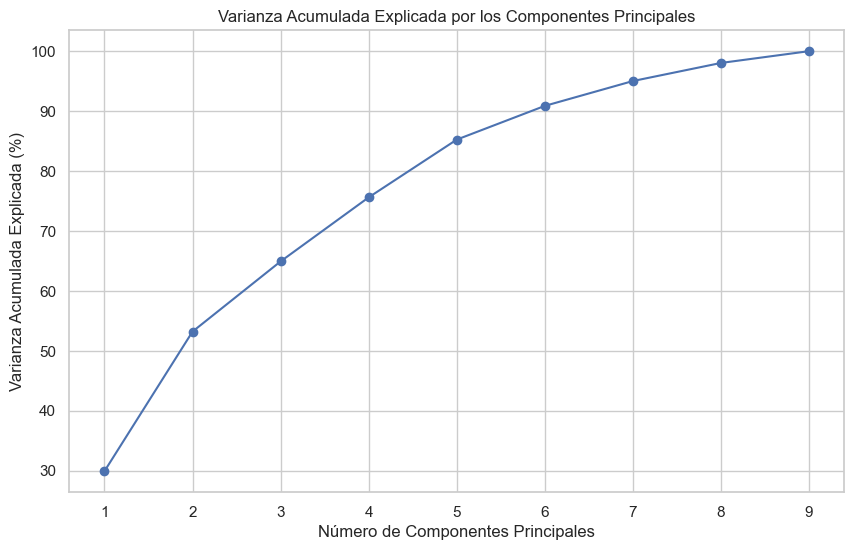

In [30]:
# Suma acumulada de la varianza explicada
cumulative_variance = np.cumsum(explained_variance)

# Graficar la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, marker='o', linestyle='-', color='b')

# Añadir etiquetas y títulos
plt.title('Varianza Acumulada Explicada por los Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada (%)')
plt.grid(True)

plt.show()

# 3

In [ ]:
varianza_acumulada_5 = explained_variance[:5].sum()
print(f"La varianza explicada acumulada por los primeros 5 componentes es: {varianza_acumulada_5:.4f}")

La varianza explicada acumulada por los primeros 5 componentes es: 0.8524


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

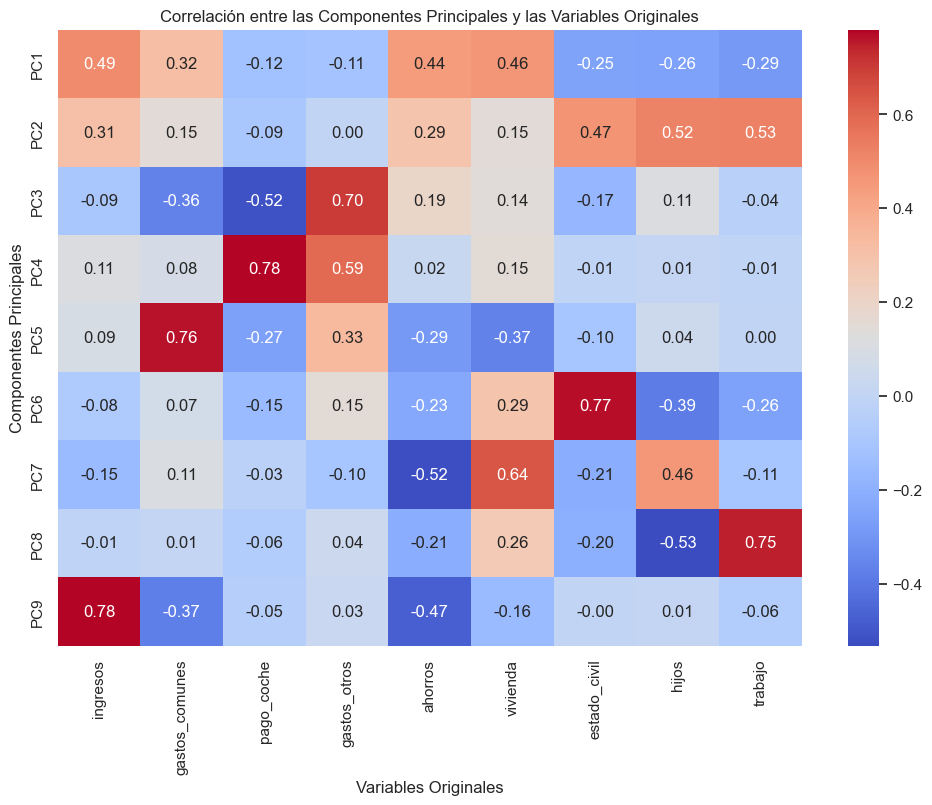

In [ ]:
columns_features = df.drop(columns=["comprar"])

components_df = pd.DataFrame(
    pca.components_,
    columns=columns_features.columns, 
    index=[f'PC{i+1}' for i in range(pca.n_components_)]  # Nombres de los PCA
)

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(components_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre las Componentes Principales y las Variables Originales")
plt.xlabel("Variables Originales")
plt.ylabel("Componentes Principales")
plt.show()

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - Un clasificador
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier  # Puedes cambiarlo por otro clasificador
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


In [56]:
# 1. Train y test
X = df.drop(columns=["comprar"]) 
y = df["comprar"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 2. Pipeline
pipeline = Pipeline([
    ("scaler", MinMaxScaler()),          
    ("pca", PCA(n_components=5)),          
    ("classifier", RandomForestClassifier(random_state=42))  
])

param_grid = {
    'classifier__n_estimators': [100, 200, 250],  
    'classifier__max_depth': [None, 5, 10, 15],  
    'classifier__min_samples_split': [2, 5, 10],  
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [72]:
# Crear el GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 5, 10, 15],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 250]},
             verbose=2)

In [73]:
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor puntuación en validación cruzada: {grid_search.best_score_}")

Mejores parámetros: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 250}
Mejor puntuación en validación cruzada: 0.8073863636363636


In [76]:
# 3. Entrena el pipeline
best_pipeline = grid_search.best_estimator_
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=5)),
                ('classifier',
                 RandomForestClassifier(max_depth=5, min_samples_split=5,
                                        n_estimators=250, random_state=42))])

In [77]:
# 4. Predice con test
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

In [78]:
# 5. Calcula el accuracy score

train_accuracy = best_pipeline.score(X_train, y_train)
test_accuracy = best_pipeline.score(X_test, y_test)

print(f"Accuracy en train con los mejores parámetros: {train_accuracy}")
print(f"Accuracy en test con los mejores parámetros: {test_accuracy}")

Accuracy en train con los mejores parámetros: 0.968944099378882
Accuracy en test con los mejores parámetros: 0.8292682926829268


[[26  1]
 [ 6  8]]


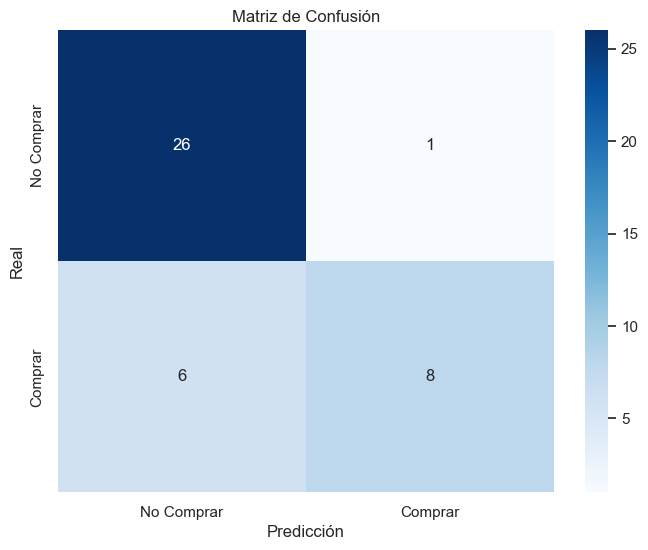

In [ ]:
# 6.Matriz de Confusion

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Comprar', 'Comprar'], yticklabels=['No Comprar', 'Comprar'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = best_pipeline.predict(X_test)  # Predicciones del modelo
y_true = y_test                    # Etiquetas verdaderas

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_true, y_pred)
print(f"F1-Score: {f1:.4f}")

# Reporte completo (opcional)
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Accuracy: 0.8293
Precision: 0.8889
Recall: 0.5714
F1-Score: 0.6957

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        27
           1       0.89      0.57      0.70        14

    accuracy                           0.83        41
   macro avg       0.85      0.77      0.79        41
weighted avg       0.84      0.83      0.82        41



In [88]:
# 9. Exportar Modelo

import pickle

bestmodel = best_pipeline['classifier']

with open('best_classifier_model.pkl', 'wb') as f:
    pickle.dump(bestmodel, f)

In [90]:
with open('best_classifier_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print(loaded_model)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=250,
                       random_state=42)
